# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

1. ¿Cuantos datos son en cada archivo?
2. ¿Qué tipo de datos tiene cada columna?
3. ¿Existen columnas con datos ausentes?
4. ¿Existen columnas repetidas en dos o mas archivos? 

Abrir los archivos con pandas, ver los encabezados con head y la informaci{on de cada archivo con info


In [1]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
# leer conjuntos de datos en los DataFrames
df_orders = pd.read_csv('./datasets/instacart_orders.csv',sep=';')
df_products = pd.read_csv('./datasets/products.csv',sep=';')
df_aisles = pd.read_csv('./datasets/aisles.csv',sep=';')
df_departments = pd.read_csv('./datasets/departments.csv',sep=';')
df_order_products = pd.read_csv('./datasets/order_products.csv',sep=';')

<div class="alert alert-block alert-success"><b>Comentario del revisor. (Iteración 1) </b> <a class="tocSkip"></a>
    
Excelente! Buena decisión la de importar las librerías y cargar los datos por separado, a la vez exclente presentación de plan. Sigamos!

In [3]:
# mostrar información del DataFrame
display(df_orders.head())
print()
print(df_orders.info())

In [4]:
# mostrar información del DataFrame
display(df_products.head())
print()
print(df_products.info())

In [5]:
# mostrar información del DataFrame
display(df_order_products.head())
print()
print(df_order_products.info())

In [6]:
# mostrar información del DataFrame
display(df_aisles.head())
print()
print(df_aisles.info())

In [7]:
# mostrar información del DataFrame
display(df_departments.head())
print()
print(df_departments.info())

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

La tienda cuenta con 49694 productos (products.cvs), de los cuales 1258 no tienen nombre (column:pruduct_name), organizados en 21 departamentos y 134 categorías.

Han tomado 478967 ordenes (instacart_orders.csv) donde 28819 pedidos no tienen información sobre si se el cliente pidio antes o no (column:days_since_prior_order)

Además:
1. la columna de identificación de la orden (order_id) está tanto en el archivo de la ordenes recibidas como en el archivo de los productos ordenados (order_products.csv)
2. la columna de identificación del producto (product_id) está tanto en el archivo de productos como en el archivo de los productos ordenados (order_products.csv)
3. la columnas de pasillo y departamente estan ademas de en sus respectivos archivos, en el archivo de producto


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

1. Buscar datos duplicados, ver que información contienen y resolver el problema 
1. Buscar datos ausentes y resolver el problema

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados

print(df_orders.duplicated().sum())

df_orders[df_orders.duplicated()]

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Todas son del dia miércoles a las 2

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_orders[(df_orders["order_dow"] ==3) & (df_orders["order_hour_of_day"]==2)]


¿Qué sugiere este resultado?

Que pudieron haberse todado dobles por la hora en la que se resalizaron, por lo que se pueden eliminar.

In [10]:
# Elimina los pedidos duplicados
df_orders = df_orders.drop_duplicates().reset_index(drop=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(df_orders.duplicated().sum())


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
df_orders['order_id'].duplicated().sum()

Describe brevemente tus hallazgos y lo que hiciste con ellos

Habia 15 registos duplicados, tomados el mismo dia y hora y con el mismo numero de orden, que se eliminaron

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
df_products.duplicated().sum()
df_products

In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
df_products['product_id'].duplicated().sum()


In [15]:
df_products['department_id'].duplicated().sum()

In [16]:
df_products['product_name'].duplicated().sum()

In [17]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name'] = df_products['product_name'].str.upper()
df_products['product_name'].duplicated().sum()

In [18]:
# Revisa si hay nombres duplicados de productos no faltantes
nonan_duplic = df_products[df_products['product_name'].isna() == False]
nonan_duplic[nonan_duplic['product_name'].duplicated()].sum


In [19]:
ejemplo = nonan_duplic[nonan_duplic['product_name']== 'BURRITO- STEAK & CHEESE']
ejemplo

Describe brevemente tus hallazgos y lo que hiciste con ellos.

el archivo de productos no contiene registros totalmente duplicados pero si nombres duplicados. Se convirtieron todos los nombres a mayúsculas para poder comparar mejor y se encontraron 1361 nombres duplicados, de los cuales 1258 son NaN y 104 son nombres duplicados pero con diferente identificador del producto. hay que unificar el id


### `departments` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
df_departments.duplicated().sum()

In [21]:
# Revisa únicamente si hay IDs duplicadas de productos
df_departments['department_id'].duplicated().sum()

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay duplicados

### `aisles` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
df_aisles.duplicated().sum()
df_aisles

In [23]:
# Revisa únicamente si hay IDs duplicadas de productos
df_aisles['aisle_id'].duplicated().sum()

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay duplicados

### `order_products` data frame

In [24]:
# Revisa si hay filas totalmente duplicadas
df_order_products.duplicated().sum()


In [25]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
df_order_products['product_id'].duplicated().sum()


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay duplicados totales, pero si hay id de productos repetidos, ya que se pudieron haber comprado mas de una vez

In [26]:
df_order_products.duplicated(['product_id','order_id']).sum()

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [27]:
# Encuentra los valores ausentes en la columna 'product_name'
df_products.isna().sum()

In [28]:
nan_products = df_products[df_products['product_name'].isna() == True]
nan_products

Describe brevemente cuáles son tus hallazgos.

In [29]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100? Si
df_aisles[df_aisles['aisle_id'] == 100]

Describe brevemente cuáles son tus hallazgos.

El valor de 100 para el pasillo corresponde a productos extraviados

In [30]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21? Si
df_departments[df_departments['department_id'] == 21]


Describe brevemente cuáles son tus hallazgos.

El valor de 21 para el departamente corresponde a productos extraviados

In [31]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
display(df_aisles[df_aisles['aisle_id'] == 100])
display(df_departments[df_departments['department_id'] == 21])

Describe brevemente cuáles son tus hallazgos.


Hay 1258 productos desconocidos o perdidos

In [32]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna('Unknow', inplace=True)
df_products.isna().sum()

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Hay 1258 productos desconocidos con diferente id

### `orders` data frame

In [33]:
# Encuentra los valores ausentes
df_orders.isna().sum()

In [93]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
#df_orders['days_since_prior_order'].fillna(0, inplace=True)
#df_orders.isna().sum()
nan_prior = df_orders[(df_orders['days_since_prior_order'].isna() == True) & (df_orders['order_number'] != 1)]
nan_prior.count()

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Hay 28819 valores ausentes y todos son de clientes que pidieron por primera vez

### `order_products` data frame

In [35]:
# Encuentra los valores ausentes
df_order_products.isna().sum()

In [36]:
# 'add_to_cart_order': el orden secuencial en el que se añadió cada artículo en el carrito
nan_order_products = df_order_products[df_order_products['add_to_cart_order'].isna() == True]
nan_order_products

In [37]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
max_val = df_order_products['add_to_cart_order'].max()
print(f'El número máximo de productos es: {max_val}')
min_val = df_order_products['add_to_cart_order'].min()
print(f'El número mínimo de productos es: {min_val}')

Describe brevemente cuáles son tus hallazgos.

Hay un maximo de 64 productos agregados y 836 ordenes que no se especifica cuantos artículos se agregaron

In [38]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
nan_order_products['order_id']


In [102]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
display(nan_order_products.groupby('order_id')['product_id'].count())
min_prod = nan_order_products.groupby('order_id')['product_id'].count()
print(f'El valor mínimo es: {min_prod.min()} y el máximos es: {min_prod.max()}')

Describe brevemente cuáles son tus hallazgos.

Todas las ordenes con NaN tienes menos de 64 productos

In [40]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'].fillna(999, inplace=True)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)
df_order_products.info()

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se puede saber cuantos productos se tienen en cada orden contandolos y cambiando el valor NaN por un numero

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


1. Hay duplicados que hay que unificar el id
2. Hay ausentes que se cambiaron por unknow
3. Hay ausentes que se cambiaron por 999



# Paso 3. Análisis de los datos



### [A1] Verifica que los valores sean sensibles

In [41]:
df_orders[(df_orders['order_dow']<0) & (df_orders['order_dow']>6)].sum()

In [42]:
df_orders[(df_orders['order_hour_of_day']<0) & (df_orders['order_hour_of_day']>23)].sum()

## Todos estan dentro del horario

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

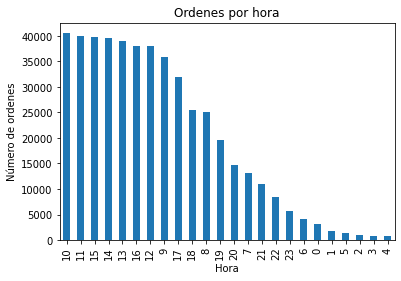

In [76]:
order_per_hour = df_orders['order_hour_of_day'].value_counts()
order_per_hour.plot(kind = 'bar',
                    title='Ordenes por hora',           
                    xlabel = 'Hora',
                    ylabel = 'Número de ordenes'
                   )

## Entgre 10 de la mañana y 4 de la tarde se hacen mas ordenes

### [A3] ¿Qué día de la semana compran víveres las personas?

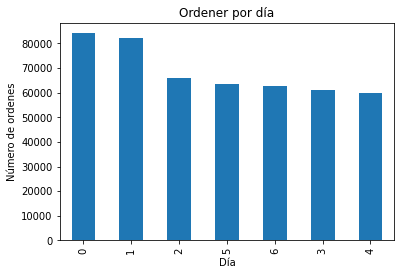

In [75]:
order_per_day = df_orders['order_dow'].value_counts()
order_per_day.plot(kind = 'bar',
                    title='Ordener por día',           
                    xlabel = 'Día',
                    ylabel = 'Número de ordenes'
                   )

## El domingo se hacen mas ordenes:84090


### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [45]:
df_orders[df_orders['days_since_prior_order'] == 0]['days_since_prior_order'].count()


In [46]:
df_orders[df_orders['days_since_prior_order'] == 30]['days_since_prior_order'].count()



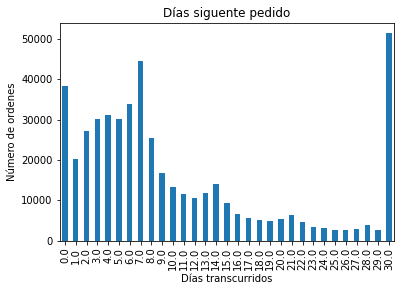

In [74]:
prior_order = df_orders.groupby('days_since_prior_order')['order_id'].count()
prior_order.plot(kind = 'bar',
                    title='Días siguente pedido',           
                    xlabel = 'Días transcurridos',
                    ylabel = 'Número de ordenes'
                   )

## 38406 son pedidos de primera vez y 51 338 pedidos son tomadas hasta 30 dias despues


### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [48]:
df_orders_wed = df_orders[df_orders['order_dow']==4]
df_orders_sat = df_orders[df_orders['order_dow']==6]

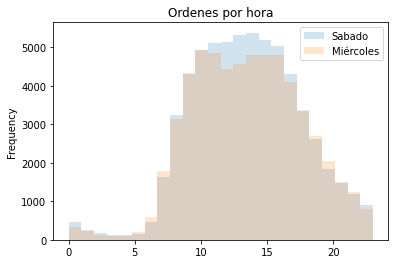

In [73]:
from matplotlib import pyplot as plt
df_orders_sat['order_hour_of_day'].plot(
        kind='hist',
        alpha=0.2,
        bins=24
)
df_orders_wed['order_hour_of_day'].plot(
        kind='hist',
        alpha=0.2,
        bins=24,
        title='Ordenes por hora',
        
        )

plt.legend(['Sabado','Miércoles'])

plt.show()

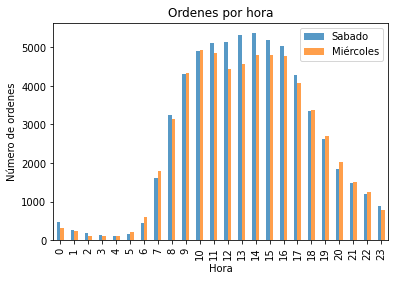

In [72]:
orders_per_hour_sat = df_orders_sat['order_hour_of_day'].value_counts().sort_index()
orders_per_hour_wed = df_orders_wed['order_hour_of_day'].value_counts().sort_index()
df = pd.DataFrame({'Sabado': orders_per_hour_sat, 'Miércoles': orders_per_hour_wed})
df.plot.bar(alpha=0.75)
plt.title('Ordenes por hora')
plt.xlabel('Hora')
plt.ylabel('Número de ordenes')
plt.legend()
plt.show()

## Hay mas ordenes los domingos que los miercoles principalmente a mediados de mes

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

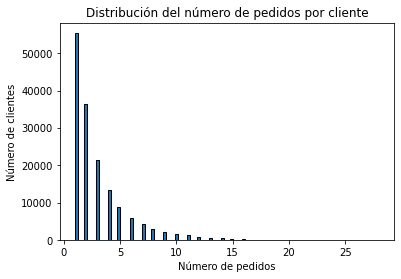

In [64]:
orders_per_customer = df_orders['user_id'].value_counts()
plt.hist(orders_per_customer, bins=100, edgecolor='black')
plt.title('Distribución del número de pedidos por cliente')
plt.xlabel('Número de pedidos')
plt.ylabel('Número de clientes')
plt.show()


## En promedio los clientes piden alrededor de 3 articulos

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [52]:
order = df_order_products[['product_id']]
product = df_products[['product_id', 'product_name']]
product_names = order.merge(product, on='product_id')
top_20_products = product_names.sort_values(by='product_id', ascending=False)
top_20 = top_20_products.value_counts()[:20]
top_20

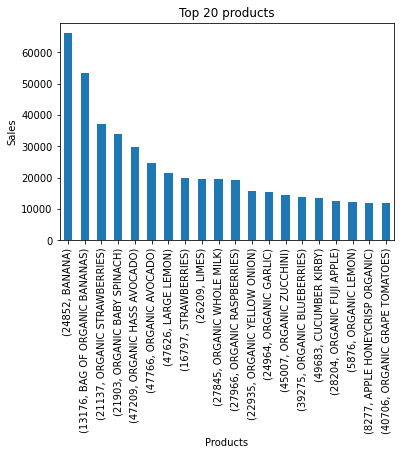

In [53]:
top_20.plot(kind='bar',
        title='Top 20 products',
        xlabel='Products',
        ylabel='Sales',
        
        ) 

## Las bananas es el producto mas comprado

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

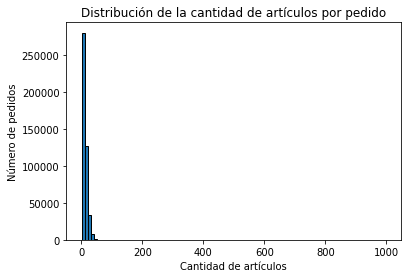

In [54]:
# Sumar los pedidos por cliente

items_per_order = df_order_products.groupby('order_id')['add_to_cart_order'].max()

average_items = items_per_order.mean()
print(f'La cantidad promedio de artículos por pedido es {average_items}')


plt.hist(items_per_order, bins=100, edgecolor='black')
plt.title('Distribución de la cantidad de artículos por pedido')
plt.xlabel('Cantidad de artículos')
plt.ylabel('Número de pedidos')
plt.show()

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [55]:
reordered_products = df_order_products[df_order_products['reordered'] == 1]
reordered_counts = reordered_products['product_id'].value_counts()
top_20_reordered = reordered_counts[:20]
top_20_product_names = df_products[df_products['product_id'].isin(top_20_reordered.index)]['product_name']
print(top_20_product_names)

## Piden nuevamente productos orgánicos

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [56]:
total_orders = df_order_products['product_id'].value_counts()
reordered_orders = df_order_products[df_order_products['reordered'] == 1]['product_id'].value_counts()
reorder_ratio = reordered_orders / total_orders
print(reorder_ratio)


## Casi todos se vueleven a pedir

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [57]:
id_order = df_order_products[['order_id','product_id','reordered']]
id_user = df_orders[['order_id', 'user_id']]
user_order = id_order.merge(id_user, on='order_id')

In [58]:
total_products = user_order.groupby('user_id')['product_id'].count()
reordered_products = user_order[user_order['reordered'] == 1].groupby('user_id')['product_id'].count()
reorder_ratio = reordered_products / total_products
reorder_ratio

## Casi todos los clientes repiten productos

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [59]:
add_order = df_order_products[['order_id','product_id','add_to_cart_order']]
add_user = df_orders[['order_id', 'user_id']]
add_user = add_order.merge(add_user, on='order_id')

In [104]:
first_added = add_user[add_user['add_to_cart_order'] == 1]
first_added_counts = first_added['product_id'].value_counts()
top_20_first_added = first_added_counts[:20]
top_20_product_names = df_products[df_products['product_id'].isin(top_20_first_added.index)]['product_name']
top_20_product_names

## La soda es lo primero que ponen en su carrito

### Conclusion general del proyecto:

El conjunto de datos proporcionado cuenta, con la información sobre las ordenes recibida (dia, hora usuario, etc.), los productos que se ordenan (nombre, id, categoría,etc.) y sobre la frecuencia de pedidos de los usuarios; por lo que se puede hacer un ánalisis general sobre de ventas y hábitos de los usuarios.

La tienda cuenta con 49694 productos, organizados en 21 departamentos y 134 categorías, solo una pequeña parte de ellos (1258) no cuentan con nombre, por lo que eso no afecta al análisis. Se le etiqueto como unknown.

En total se han tomado 478967 ordenes, donde 28819 pedidos no tienen información sobre si se el cliente pidio antes o no. Igual que en el caso de los nombres de los productos, esta falta de información, por ser muy poca, no afecta el análisis.

Sobre los habitos de compra de los usuarios, tenemos que los dias de mas venta son los domingos y lunes y las horas son entre 10 de la mañana y 4 de la tarde y la mayoria de los clientes prefieren hacer las compras mensuales, si repiten, pero la probabilidad de que eso pase apenas es del 57%.

En promedio, los clientes compran 64 productos por pedido, siendo los productos orgánicos los mas solicitados.

Con esta información,se podrian implementar mejoras como:
1. Hacer promociones en los dias menos concurridos para aumentar las ventas
2. Sustituir los productos menos pedidos
3. Ofrecer recompensas a clientes frecuentes
